## **MA5606 Tópicos Matemáticos en Aprendizaje de Máquinas, Redes Neuronales y Aprendizaje Profundo**

### **Tarea 1: Redes neuronales feedfoward y PINNs**

**Profesores: Claudio Muñoz y Joaquín Fontbona**

**Auxiliares: Javier Maass y Diego Olguín**

**Nombres integrantes: COMPLETAR**

**Instrucciones:**

- **Fecha de entrega:** **26 de abril de 2024, a las 23:59.**

- **Importante:** Si trabaja desde el link de Google Colab (muy recomendable para trabajar con DeepXDE) debe hacer un copia en su Drive antes de trabajar, de lo contrario se podrían no guardar sus códigos.

- Debe entregar un Jupyter Notebook (archivo .ipynb) con sus código en Python. Le pueden ser de mucha utilidad los códigos vistos en la actividad práctica.

- Sus códigos deben estar comentados y ordenados. Además, en formato texto debe colocar todas sus conclusiones y resultados pedidos que deban ser redactados.

- En todos los ejercicios se le pide hacer al menos un gráfico. Los gráficos que realicen deben ser claros, con títulos y nombres en los ejes, junto con leyendas si es que corresponde.

In [99]:
# Librerías

# Numpy y matplotlib, junto con seaborn, para gráficos un poco mejores
import numpy as np
import matplotlib.pyplot as plt

# Puede ser útil para hacer gráficos con barras de colores
from mpl_toolkits.axes_grid1 import make_axes_locatable

import seaborn as sns

sns.set_theme()

# PyTorch y módulos que serán necesario
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import pandas as pd

In [100]:
# Clase para crear redes neuronales
class NeuralNetwork(nn.Module):
    """
    Clase que define una red neuronal con una cantidad de capas y neuronas por capa definida por el usuario.
    Es una subclase de nn.Module, la clase base para todos los módulos de PyTorch.
    """

    def __init__(
        self,
        dim_input: int,
        dim_output: int,
        n_hidden_layers: int,
        width: int,
        activation: callable,
    ) -> None:
        """
        Constructor de la clase, que recibe los parámetros necesarios para crear una red neuronal.

        Args:
            - dim_input (int): Dimensión de la entrada.
            - dim_output (int): Dimensión de la salida.
            - n_hidden_layers (int): Número de capas internas.
            - wide (int): Ancho de las capas internas.
            - activation (callable): Función de activación.

        Returns:
            - None

        Rasies:
            - AssertionError: Si dim_input, dim_output, n_hidden_layers o wide no son enteros positivos.
            - AssertionError: Si activation no es una función.
        """
        super().__init__()  # Inicia el constructor de la clase base (nn.Module)

        for int_input, name in zip(
            [dim_input, dim_output, n_hidden_layers, width],
            ["dim_input", "dim_output", "n_hidden_layers", "width"],
        ):
            assert (
                isinstance(int_input, int) and int_input > 0
            ), f"Error en los parámetros de la red. Error: {int_input} ({name}) debe ser un entero positivo."
        assert callable(
            activation
        ), "Error en los parámetros de la red. Error: activation debe ser una función."

        self.first_layer = nn.Linear(dim_input, width)
        self.inner_layers = nn.ModuleList(
            [nn.Linear(width, width) for _ in range(n_hidden_layers - 1)]
        )
        self.last_layer = nn.Linear(width, dim_output)

        self.activation = activation

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Describe cómo se calcula la salida de la red a partir de la entrada.

        Args:
            - x (torch.Tensor): Tensor de entrada.

        Returns:
            - torch.Tensor: Tensor de salida.
        """
        x = self.activation(self.first_layer(x))
        for layer in self.inner_layers:
            x = self.activation(layer(x))
        x = self.last_layer(x)

        return x


"""
Notas:
- Un modulo de PyTorch es una red neuronal creada con PyTorch.
- nn.Module es la clase base para todos los módulos de PyTorch.
- nn.ModuleList es similar a las listas de python diseñada específicamente para almacenar modulos.
- nn.Linear(in_features(int), out_features(int)) crea una transformación afín desde una capa de in_features dimensiones a una capa de out_features dimensiones (y=xA^T + b).
- super().__init__() llama al constructor de la clase base. Es necesario para cualquier modulo de PyTorch.
- forward describe cómo se calcula la salida de la red a partir de la entrada.
"""

'\nNotas:\n- Un modulo de PyTorch es una red neuronal creada con PyTorch.\n- nn.Module es la clase base para todos los módulos de PyTorch.\n- nn.ModuleList es similar a las listas de python diseñada específicamente para almacenar modulos.\n- nn.Linear(in_features(int), out_features(int)) crea una transformación afín desde una capa de in_features dimensiones a una capa de out_features dimensiones (y=xA^T + b).\n- super().__init__() llama al constructor de la clase base. Es necesario para cualquier modulo de PyTorch.\n- forward describe cómo se calcula la salida de la red a partir de la entrada.\n'

In [101]:
def derivative(
    f: callable, x: torch.Tensor, order: int = 1, create_graph: bool = False
) -> torch.Tensor:
    """
    Toma una función y una colección del dominio y entrega la derivada del orden deciado de la función en esos puntos en un tensor.

    Args:
        - f (callable): Función de la que se quiere calcular la derivada.
        - x (torch.Tensor): Tensor de puntos en los que se quiere calcular la derivada.
        - order (int): Orden de la derivada que se quiere calcular.
        - create_graph (bool): Si es True, se crea un grafo de computación para la última derivada. Útil para calcular derivadas de orden superior.

    Returns:
        - torch.Tensor: Tensor con las derivadas de f en los puntos de variable.

    Raises:
        - AssertionError: Si f no es una función.
        - AssertionError: Si x no es un tensor.
        - AssertionError: Si x no tiene el atributo requires_grad en True.
    """
    assert callable(f), "Error: f debe ser una función."
    assert isinstance(x, torch.Tensor), f"Error: variable debe ser un tensor pero es {type(x)}."
    assert (
        isinstance(order, int) and order > 0
    ), "Error: order debe ser un entero positivo."

    x.requires_grad_()
    y = f(x)

    for n in range(order):
        hidden_create_graph = create_graph if n == order - 1 else True
        y = torch.autograd.grad(
            y, x, grad_outputs=torch.ones_like(y), create_graph=hidden_create_graph
        )[0]

    return y

## **Ejercicio 1**

El objetivo de este ejercicio es estudiar la aproximación vía redes neuronales del problema de frontera

$$ y''(x) + \frac{\pi^2}{4} y(x) = 0 $$
$$ y(-1) = y(1) = 0, \, y(0) = 1$$

Para ello utilice redes de 1 capa oculta de ancho $N$, usando $N = \{ 10, 20, 30, 100\}$. Entrene la red con 600 iteraciones del algoritmo ``Adam``.

En cada caso grafique la evolución de la función de pérdida en las iteraciones de entrenamiento, además de la red evaluada en puntos en el intervalo $[-1,1]$ y compare con la solución analítica:

$$ y(x) = \cos \left (\frac{\pi}{2} x \right ) $$

Width = 10:
 Iteración  Pérdida
       100 0.000719
       200 0.000074
       300 0.000074
       400 0.000075
       500 0.000075
       600 0.000076
Width = 20:
 Iteración  Pérdida
       100 0.000370
       200 0.000100
       300 0.000100
       400 0.000101
       500 0.000101
       600 0.000101
Width = 30:
 Iteración  Pérdida
       100 0.000148
       200 0.000110
       300 0.000110
       400 0.000111
       500 0.000111
       600 0.000112
Width = 100:
 Iteración  Pérdida
       100 0.000037
       200 0.000023
       300 0.000024
       400 0.000024
       500 0.000024
       600 0.000024


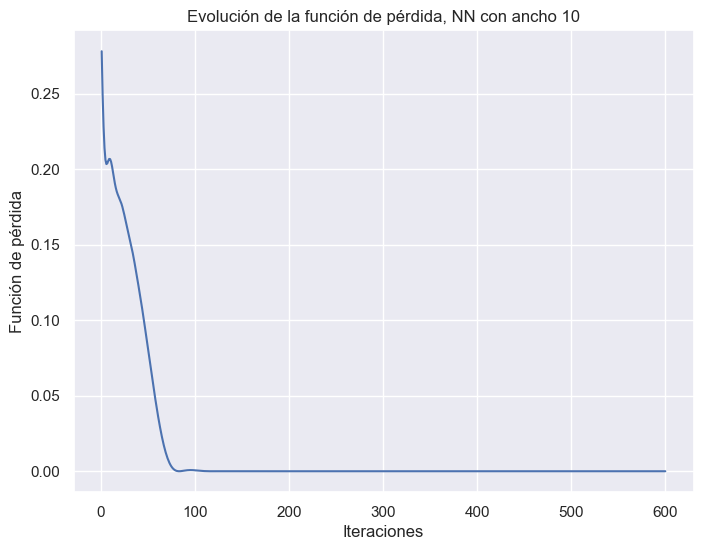

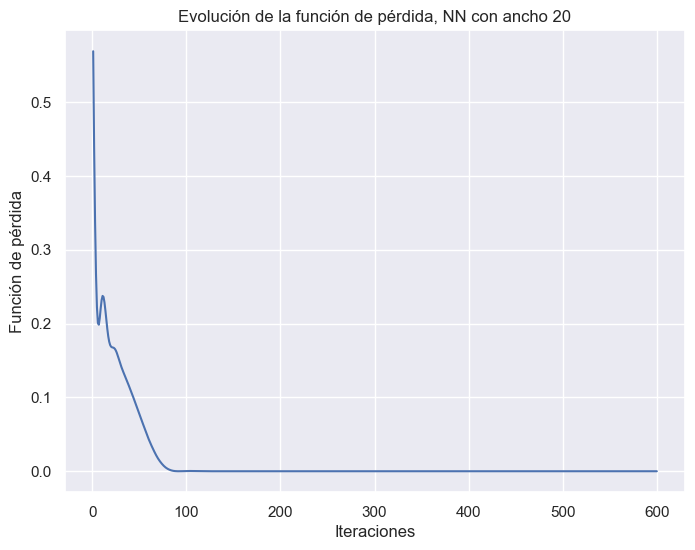

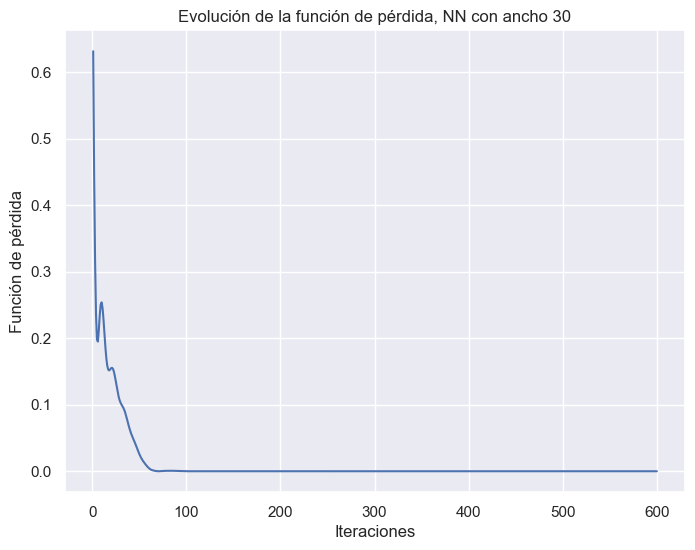

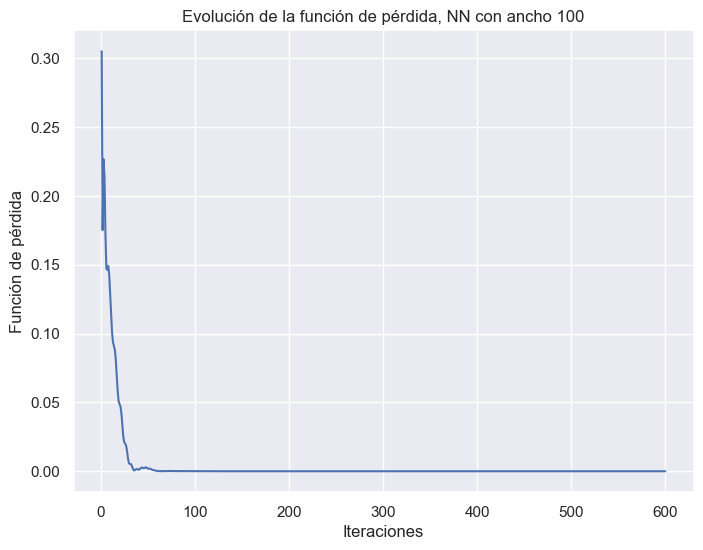

In [102]:
torch.manual_seed(42)

# El problema:
analitic = lambda x: torch.cos((np.pi / 2) * x)
x0 = torch.tensor([[-1.0], [1.0], [0.0]])
y0 = torch.tensor([[0.0], [0.0], [1.0]])

# Parametros
gamma = 0.01  # Learning rate.
N = [
     10,
     20, 
     30, 
     100
     ]  # Anchos de las NN.
resolution = 1000  # Cardinalidad de la partición de [-1,1].
X = (2 * torch.rand(resolution) - 1).unsqueeze(1)  # partición de [-1,1].
w0 = 0.9999
wphi = 1 - w0
w = (w0, wphi)  # Pesos para la función error.
iters = 600  # Iteraciones de entrenamiento.

# Listas de redes y optimizadores
neural_list = nn.ModuleList()
optimizer_list = []

# Creación de las redes y optimizadores
for n in N:
    NN = NeuralNetwork(
        dim_input=1, dim_output=1, n_hidden_layers=1, width=n, activation=F.tanh
    )
    neural_list.append(NN)

    optimizer = optim.Adam(NN.parameters(), lr=gamma)
    optimizer_list.append(optimizer)


# Función objetivo
def error(NN: NeuralNetwork, X: torch.Tensor) -> torch.Tensor:
    """
    Función de error para la PINNs del ejercicio 1.

    Args:
        - NN (nn.Module): Red neuronal.

    Returns:
        - torch.Tensor: Valor del error.

    Raises:
        - AssertionError: Si NN no es una red neuronal.
    """
    assert isinstance(NN, nn.Module), "Error: NN debe ser una red neuronal."

    loss = nn.MSELoss()

    # Error inicial
    NN_y0 = NN(x0)
    MSE0 = loss(NN_y0, y0)

    # Predicción de la red
    epsilon = derivative(NN, X, order=2) + ((np.pi**2) / 4) * NN(X)
    MSEphi = loss(epsilon, torch.zeros_like(epsilon))

    objective = w[0] * MSE0 + w[1] * MSEphi

    return objective


# Función necesaria para el optimizador
def closure(
    NN: NeuralNetwork, optimizer: optim.Optimizer, X: torch.Tensor
) -> torch.Tensor:
    optimizer.zero_grad()  # Se actualizan los pesos haciendo gradiente 0
    loss = error(NN, X)  # Se calcula la función de pérdida
    loss.backward()  # Diferenciación automática
    return loss


loss_record = {f"{width}": [] for width in N}


def train(NN: NeuralNetwork, X: torch.Tensor, optimizer: optim.Optimizer) -> None:
    """
    Función que entrena una red neuronal.

    Args:
        - NN (nn.Module): Red neuronal.
        - optimizer (optim.Optimizer): Optimizador.
        - width (int): Ancho de la red.

    Returns:
        - None

    Raises:
        - AssertionError: Si NN no es una red neuronal.
        - AssertionError: Si X no es un tensor.
        - AssertionError: Si optimizer no es un optimizador.
    """
    assert isinstance(NN, nn.Module), "Error: NN debe ser una red neuronal."
    assert isinstance(
        X, torch.Tensor
    ), f"Error: X debe ser un tensor pero es {type(X)}."
    assert isinstance(
        optimizer, optim.Optimizer
    ), "Error: optimizer debe ser un optimizador."

    width = NN.first_layer.out_features
    data = {"Iteración": [], "Pérdida": []}
    try:
        for iter in range(1, iters + 1):

            # Guardamos la pérdida calculada
            error_value = error(NN, X).item()
            loss_record[f"{width}"] += [error_value]
            # Paso del optimizador
            optimizer.step(lambda: closure(NN, optimizer, X))

            # Imprimimos la pérdida en cada iteración, cada ciertas iteraciones
            if iter % 100 == 0:
                data["Iteración"].append(iter)
                data["Pérdida"].append(error_value)
            
            if error_value >= 10:
                break

    # Hacer esta sentencia try, except de esta forma hace que
    # podamos parar el entrenamiento sin que haya error
    except KeyboardInterrupt:
        pass
    data = pd.DataFrame(data)
    print(data.to_string(index=False))


for NN, optimizer in zip(neural_list, optimizer_list):
    print(f"Width = {NN.first_layer.out_features}:")
    train(NN, X, optimizer)

for width in N:
    # Gráfico de la función de pérdida en las iteraciones
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, iters + 1), loss_record[f"{width}"])
    plt.xlabel("Iteraciones")
    plt.ylabel("Función de pérdida")
    plt.title(f"Evolución de la función de pérdida, NN con ancho {width}")
    plt.show()

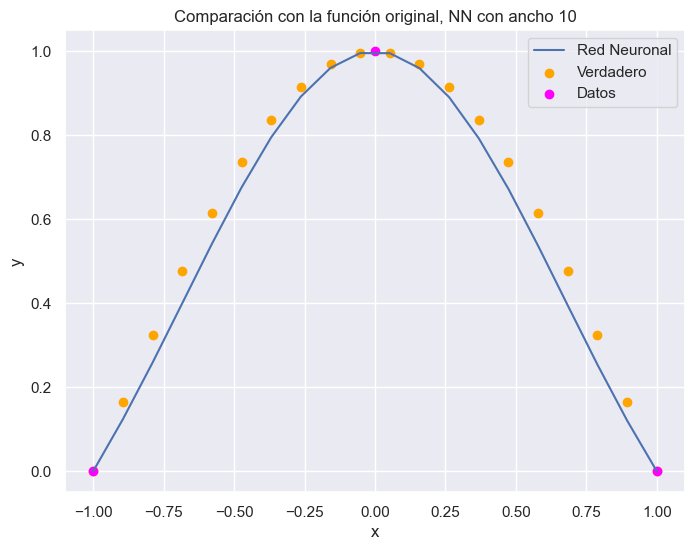

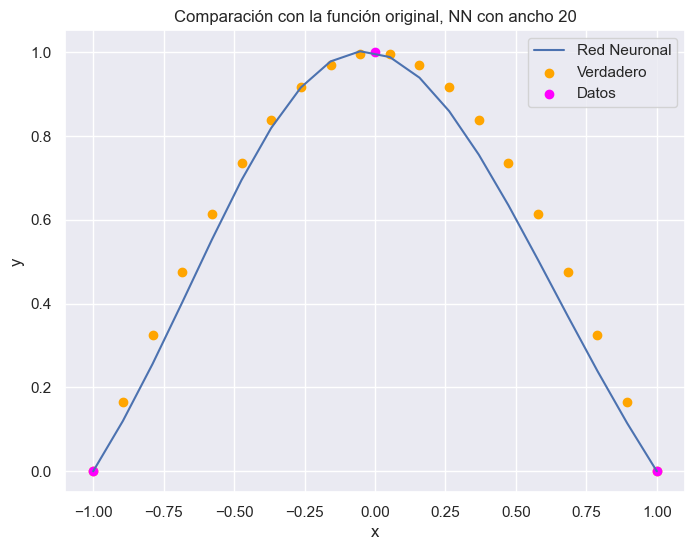

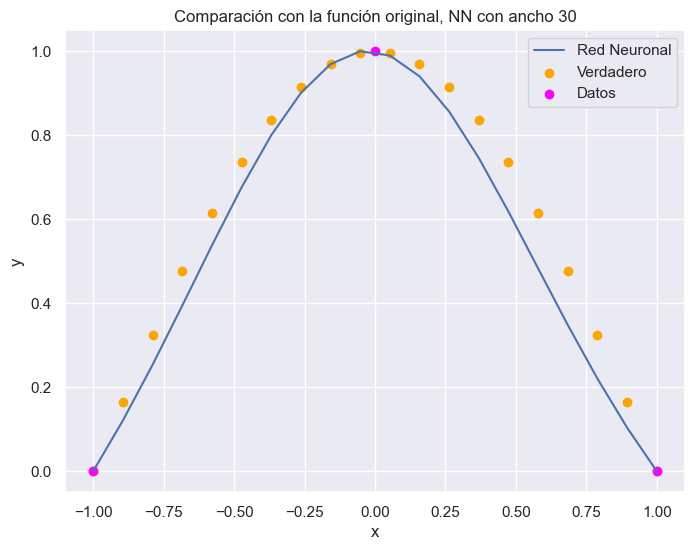

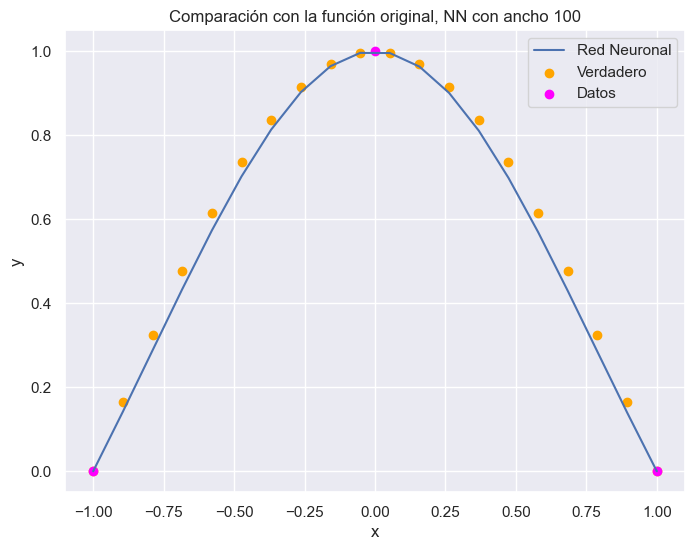

In [103]:
for NN in neural_list:
    N_test = 20
    X_test = torch.linspace(-1, 1, N_test).reshape((N_test, 1))
    y_test = NN(X_test).squeeze()
    y_true = analitic(X_test).squeeze()

    datax = [x0[0][0], x0[1][0], x0[2][0]]
    datay = [NN(x0).detach()[0][0], NN(x0).detach()[1][0], NN(x0).detach()[2][0]]

    fix, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.plot(X_test, y_test.detach(), label="Red Neuronal")
    ax.scatter(X_test, y_true, label="Verdadero", c="orange")
    ax.scatter(datax, datay, c="magenta", label="Datos")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(f"Comparación con la función original, NN con ancho {NN.first_layer.out_features}")
    ax.legend()
    plt.show()


## **Ejercicio 2**



Veremos nuevamente el problema de EDP de Helmholtz

$$ -\Delta u - k_0^2 u = f, \quad \Omega = (0,1)^2 $$
$$ u = 0, \quad ∂ Ω $$

Que tiene solución analítica

$$ u(x, y) =  \sin (k_0 x) \sin (k_0 y)$$

Cuando $f(x,y) = k_0^2 \sin (k_0 x) \sin (k_0 y)$. Considere $k_0 = 2 n \pi$ y entrene una red neuronal de 3 capas, 100 neuronas por capa, función de activación seno y 3000 iteraciones del optimizador Adam, que resuelva el problema para $n \in \{ 1, 3, 5 \}$. Grafique la función de pérdida en función de las iteraciones de entrenamiento y el resultado de la red, comparando este con la solución analítica. ¿Qué resultado observa para los distintos $n$ propuestos?

In [104]:
# Instalamos e importamos la librería
import deepxde as dde


# Importamos Tensorflow, que es el backend que utilizaremos
import tensorflow as tf

In [105]:
# Solución!

### **Ejercicio 3**

Considere el problema de Poisson

$$ -\Delta u = x(1-x) + y(1-y), \quad \Omega = (0,1)^2 $$
$$ u = 0, \quad ∂ Ω $$

Que tiene solución analítica

$$ u(x, y) = \frac{1}{2} x(1-x)y(1-y)$$

Entrene una red neuronal que aproxime la solución al problema, para ello considere una red de 3 capas, 100 neuronas por cada, función de activatión tangente hiperbólica y 500 iteraciones del optimizador Adam. Grafique la función de pérdida en función de las iteraciones de entrenamiento y el resultado de la red, comparando este con la solución analítica del problema.


In [106]:
# Solución!